In [33]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Visualize results of Data augmentation

In [252]:
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle as pkl
import itertools

In [266]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/DataAugmentation'
pdDataAug=pkl.load(open(os.path.join(sRoot, 'pdTestResults.p'),'rb'))
pdDataAug2=pkl.load(open(os.path.join(sRoot, 'pdTestResults_50k.p'),'rb'))
pdDataAug3=pkl.load(open(os.path.join(sRoot, 'pdTestResults_100k.p'),'rb'))
pdDataAug=pd.concat([pdDataAug, pdDataAug2, pdDataAug3])

In [267]:
#pdDataAug=pd.DataFrame.from_csv(os.path.join(sRoot, 'TimeseriesAugmentation.csv'), index_col=None)
pdDataAug.loc[pdDataAug['Which']=='Standard', 'Augmentation Method'] = 'None'
pdDataAug['Noise']=pdDataAug[['Noise in timeseries', 'Noise in components']].apply(tuple, axis=1)

pdDataAug.loc[pdDataAug['Noise']==(0,0), 'Noise'] = 'None'
pdDataAug.loc[pdDataAug['Noise']==(1,0), 'Noise'] = 'Timeseries'
pdDataAug.loc[pdDataAug['Noise']==(0,1), 'Noise'] = 'Components'
pdDataAug.loc[pdDataAug['Noise']==(1,1), 'Noise'] = 'Both'

pdDataAug.loc[pdDataAug['Noise in timeseries']==0, 'Noise in timeseries'] = 'None'
pdDataAug.loc[pdDataAug['Noise in timeseries']==1, 'Noise in timeseries'] = 'Present'
pdDataAug.loc[pdDataAug['Noise in components']==0, 'Noise in components'] = 'None'
pdDataAug.loc[pdDataAug['Noise in components']==1, 'Noise in components'] = 'Present'

pdDataAug=pdDataAug.drop(columns=['Which'])
pdDataAug['Generalization Error Te']=pdDataAug['Validation AUC ROC']-pdDataAug['Test AUC ROC']

In [271]:
lsColumns=list(pdDataAug.columns[3:10])
lsColumns.append('Generalization Error Te')
lsColumns

['Number of additional samples',
 'Train AUC ROC',
 'Train std. error',
 'Validation AUC ROC',
 'Validation std. error',
 'Test AUC ROC',
 'Generalization Error',
 'Generalization Error Te']

In [272]:
for sColumn in lsColumns:
    pdDataAug[sColumn]=pdDataAug[sColumn].astype(float)

In [310]:
def fPlot(pdData, sX, sY, sHue):
    if sHue is None:
        sTag=''
    else:
        sTag=f' Colored by {sHue.title()}'
    plt.title("\n".join(wrap(f'{sY} by {sX}{sTag}')))
    if (sX=='Number of additional samples' and sHue=='Noise'):
        sns.scatterplot(x=sX, y=sY, hue=sHue, data=pdDataAug)
    else:
        sns.violinplot(x=sX, y=sY, hue=sHue, data=pdDataAug)
    sEmpty=''
    if sHue is None:
        sHue='NA'
    plt.savefig(os.path.join(sRoot, 'Images', f'{sY.title().replace(" ","")}By{sX.title().replace(" ","")}CodedWith{sHue.title().replace(" ","")}.png'))
    plt.close()

In [311]:
lsX=['Augmentation Method', 'Number of additional samples']
lsY=['Generalization Error', 'Generalization Error Te', 'Train AUC ROC','Validation AUC ROC','Test AUC ROC']
lsHues=[None,'Augmentation Method','Noise in timeseries','Noise in components','Noise']

In [312]:
lsAllCombos=list(itertools.product(*[lsX, lsY, lsHues]))

In [314]:
for (sX, sY, sHue) in lsAllCombos:
    if sX!=sHue:
        print(f'X:{sX}\nY:{sY}\nHue:{sHue}')
        fPlot(pdDataAug, sX, sY, sHue)
    else:
        pass

X:Augmentation Method
Y:Generalization Error
Hue:None
X:Augmentation Method
Y:Generalization Error
Hue:Noise in timeseries
X:Augmentation Method
Y:Generalization Error
Hue:Noise in components
X:Augmentation Method
Y:Generalization Error
Hue:Noise
X:Augmentation Method
Y:Generalization Error Te
Hue:None
X:Augmentation Method
Y:Generalization Error Te
Hue:Noise in timeseries
X:Augmentation Method
Y:Generalization Error Te
Hue:Noise in components
X:Augmentation Method
Y:Generalization Error Te
Hue:Noise
X:Augmentation Method
Y:Train AUC ROC
Hue:None
X:Augmentation Method
Y:Train AUC ROC
Hue:Noise in timeseries
X:Augmentation Method
Y:Train AUC ROC
Hue:Noise in components
X:Augmentation Method
Y:Train AUC ROC
Hue:Noise
X:Augmentation Method
Y:Validation AUC ROC
Hue:None
X:Augmentation Method
Y:Validation AUC ROC
Hue:Noise in timeseries
X:Augmentation Method
Y:Validation AUC ROC
Hue:Noise in components
X:Augmentation Method
Y:Validation AUC ROC
Hue:Noise
X:Augmentation Method
Y:Test AUC ROC

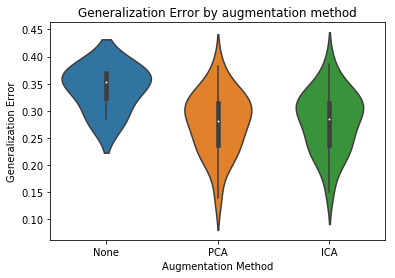

In [207]:
plt.title("\n".join(wrap('Generalization Error by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Generalization Error', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByAug_v2.png'))

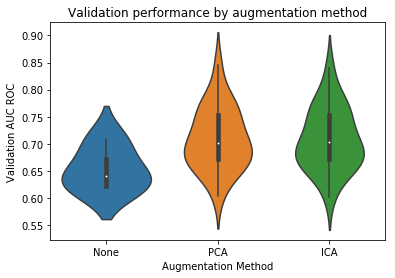

In [226]:
plt.title("\n".join(wrap('Validation performance by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Validation AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByAug_v2.png'))

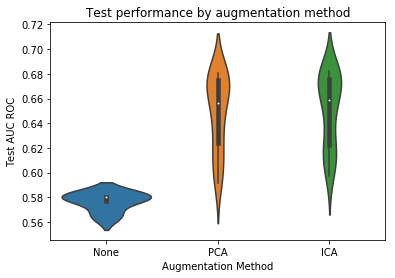

In [208]:
plt.title("\n".join(wrap('Test performance by augmentation method')))
sns.violinplot(x='Augmentation Method', y='Test AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByAug_v2.png'))

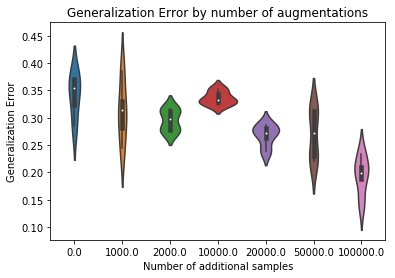

In [209]:
plt.title("\n".join(wrap('Generalization Error by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByNumberAug_v2.png'))

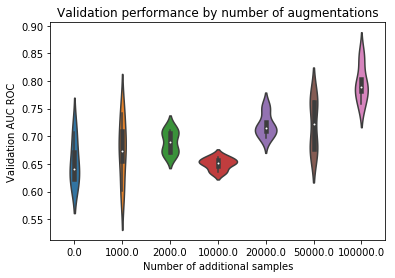

In [225]:
plt.title("\n".join(wrap('Validation performance by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByNumberAug_v2.png'))

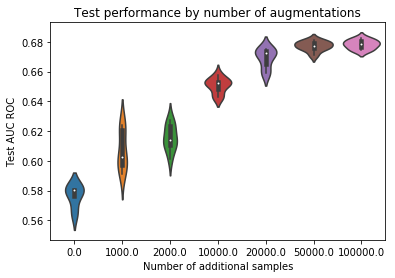

In [210]:
plt.title("\n".join(wrap('Test performance by number of augmentations')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByNumberAug_v2.png'))

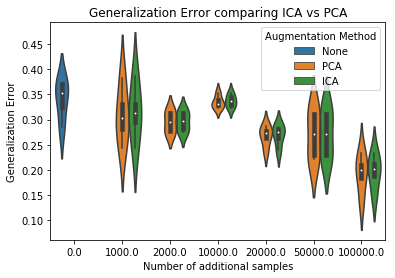

In [211]:
plt.title("\n".join(wrap('Generalization Error comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByDecomp_v2.png'))

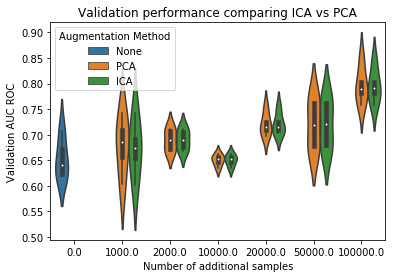

In [224]:
plt.title("\n".join(wrap('Validation performance comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByNumberAug_v2.png'))

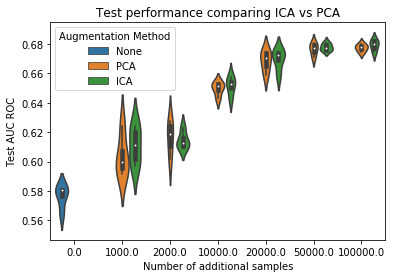

In [212]:
plt.title("\n".join(wrap('Test performance comparing ICA vs PCA')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Augmentation Method', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByNumberAug_v2.png'))

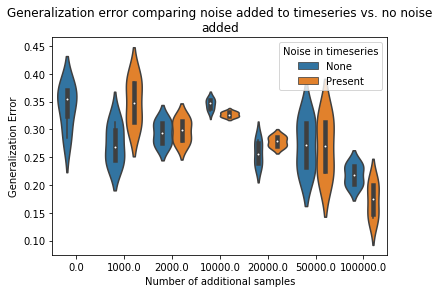

In [213]:
plt.title("\n".join(wrap('Generalization error comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByTimeseriesNoise_v2.png'))

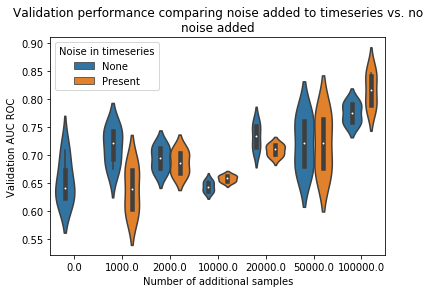

In [223]:
plt.title("\n".join(wrap('Validation performance comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByTimeseriesNoise_v2.png'))

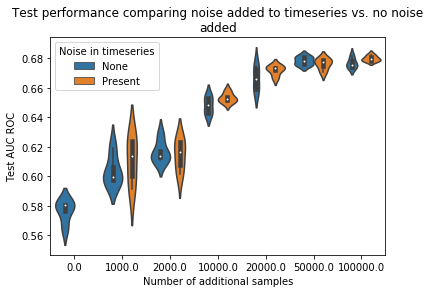

In [214]:
plt.title("\n".join(wrap('Test performance comparing noise added to timeseries vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Noise in timeseries', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByTimeseriesNoise_v2.png'))

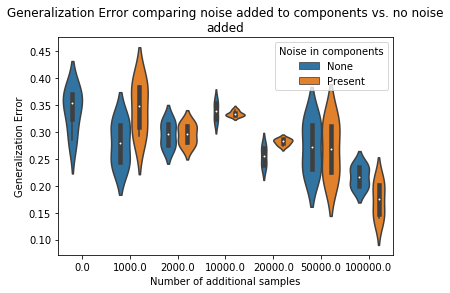

In [215]:
plt.title("\n".join(wrap('Generalization Error comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Generalization Error', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByComponentNoise_v2.png'))

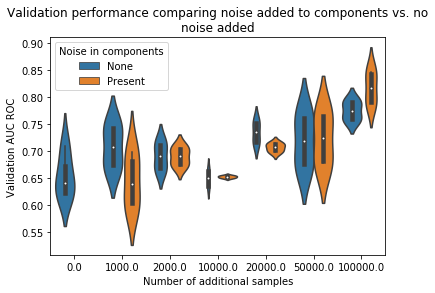

In [222]:
plt.title("\n".join(wrap('Validation performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Validation AUC ROC', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'ValidationPerfByComponentNoise_v2.png'))

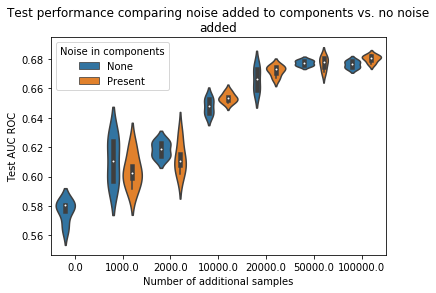

In [216]:
plt.title("\n".join(wrap('Test performance comparing noise added to components vs. no noise added')))
sns.violinplot(x='Number of additional samples', y='Test AUC ROC', hue='Noise in components', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerfByComponentNoise_v2.png'))

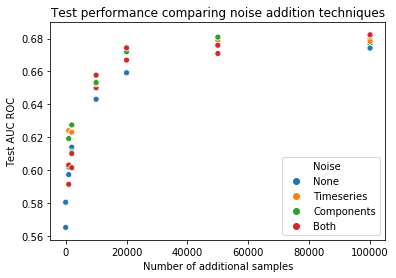

In [217]:
plt.title("\n".join(wrap('Test performance comparing noise addition techniques')))
sns.scatterplot(x='Number of additional samples', y='Test AUC ROC', hue='Noise', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'TestPerformanceByNoiseTechniques_v2.png'))

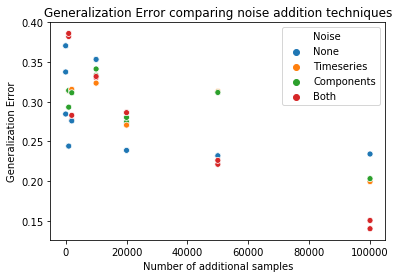

In [218]:
plt.title("\n".join(wrap('Generalization Error comparing noise addition techniques')))
g=sns.scatterplot(x='Number of additional samples', y='Generalization Error', hue='Noise', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorByNoiseTechniques_v2.png'))

In [220]:
pdDataAug['Generalization Error Te']=pdDataAug['Validation AUC ROC']-pdDataAug['Test AUC ROC']

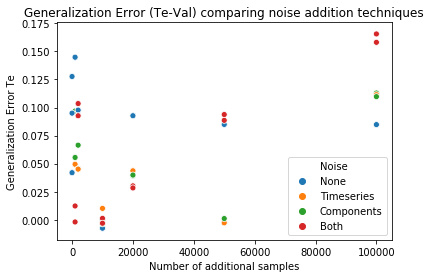

In [221]:
plt.title("\n".join(wrap('Generalization Error (Te-Val) comparing noise addition techniques')))
g=sns.scatterplot(x='Number of additional samples', y='Generalization Error Te', hue='Noise', data=pdDataAug)
plt.savefig(os.path.join(sRoot, 'Images', 'GeneralizationErrorTeByNoiseTechniques_v2.png'))